In [3]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Dickey-Fuller Test
from statsmodels.tsa.stattools import pacf # PACF function

def test_stationarity(timeseries): # Вывод результатов теста
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='t-stat')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Pavel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [5]:
data = pd.read_csv('data2.csv',encoding="utf-8",index_col=0)
#data.shape
data.columns = ['Value']
data.index = pd.date_range(start='2018-10-01',periods=300,freq='D')
data.index.name = 'Time'
data.head(20)

,Value
Time,
2018-10-01,2.186541
2018-10-02,4.112926
2018-10-03,2.342754
2018-10-04,0.886390
2018-10-05,1.538709
2018-10-06,1.448683
2018-10-07,2.745853
2018-10-08,1.216514
2018-10-09,3.491387


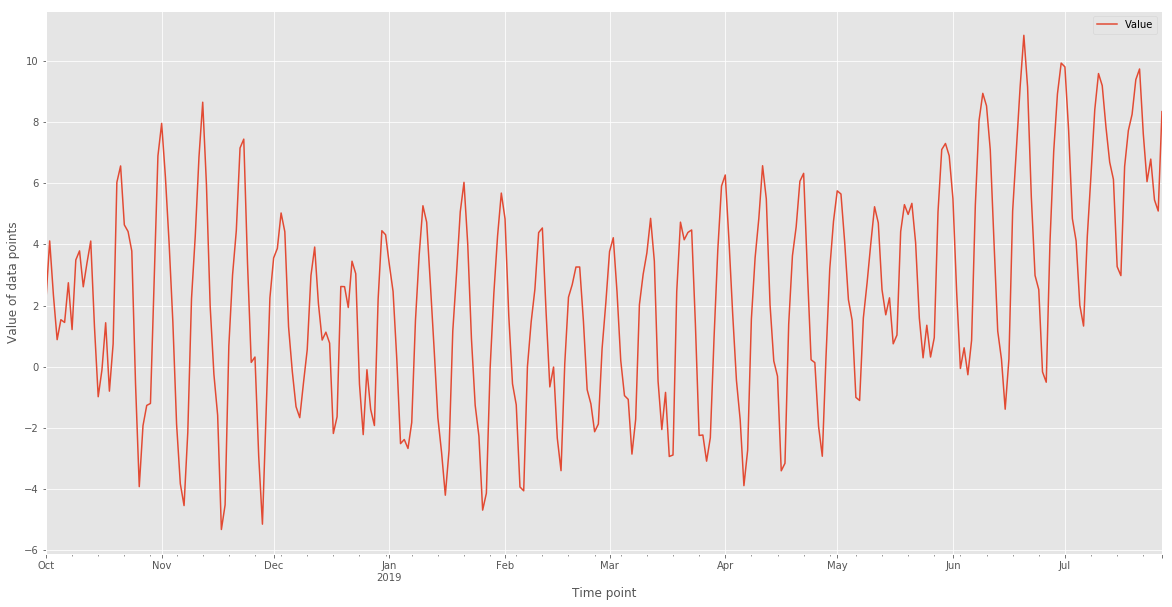

In [6]:
data.plot()
plt.ylabel('Value of data points')
plt.xlabel('Time point')
plt.show()

In [7]:
print("Mean of time series: %f" % data['Value'].mean())
print("Standart deviation of time series: %f" % data['Value'].std())

Mean of time series: 2.259256
Standart deviation of time series: 3.456680


In [8]:
# Dickey-Fuller test on stationarity
test_stationarity(data['Value'])

Results of Dickey-Fuller Test:
Test Statistic                   6.234569
p-value                          1.000000
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


### Test Statistic value < Critical shrinkage (-3,96) -> we can not tell anything about stationarity

In [9]:
data_diff = data - data.shift(periods=1) # Let's subtract series with shift=1 from itself
data_diff.dropna(inplace=True) # Take out first row without differential value

test_stationarity(data_diff['Value'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.037976
p-value                          0.001224
#Lags Used                      16.000000
Number of Observations Used    282.000000
Critical Value (1%)             -3.453754
Critical Value (5%)             -2.871844
Critical Value (10%)            -2.572261
dtype: float64


### Test Statistic value< Critical shrinkage(-3,96) -> our series has stationarity. Let's take d in (1,2)

### Parameter p defines 'depth of timeline' which will be accounted for prediction of series values in each specific time moment.
### To define optimal value of this parameter we will build PACF graph:

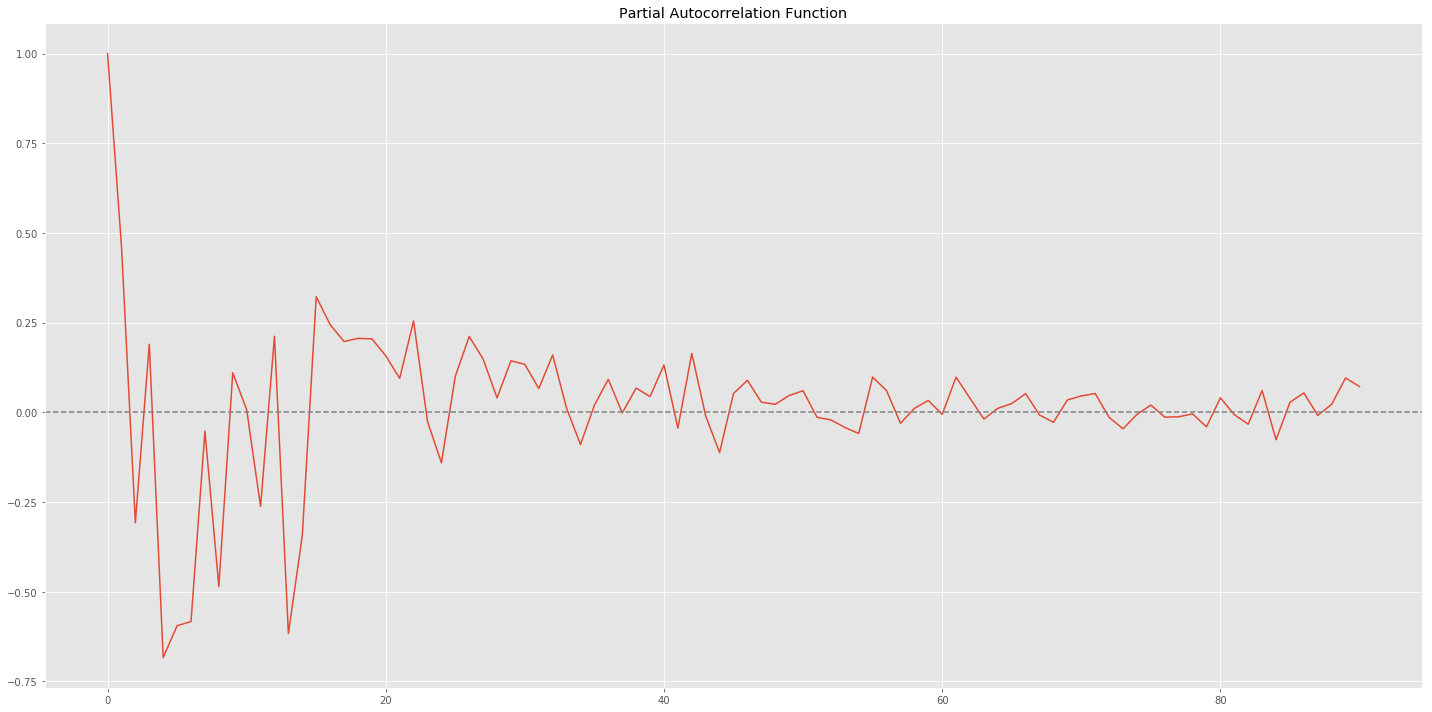

In [10]:
# Parameter p estimation (time lag for Auto Regression model)
lag_pacf = pacf(data_diff, nlags=90, method='ols') # PACF calculation
plt.plot(lag_pacf) # Make a plot
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### Can not say clearly, which time lag would be optimal.
### Consider p in range(15,30)

In [11]:
# Define the d and q parameters to take any value between 0 and 1


d = q = range(0, 3)
# Define the p parameters to take any value between 0 and 3
p = range(15, 30)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [69]:
pdq

[(15, 0, 0),
 (15, 0, 1),
 (15, 0, 2),
 (15, 1, 0),
 (15, 1, 1),
 (15, 1, 2),
 (15, 2, 0),
 (15, 2, 1),
 (15, 2, 2),
 (16, 0, 0),
 (16, 0, 1),
 (16, 0, 2),
 (16, 1, 0),
 (16, 1, 1),
 (16, 1, 2),
 (16, 2, 0),
 (16, 2, 1),
 (16, 2, 2),
 (17, 0, 0),
 (17, 0, 1),
 (17, 0, 2),
 (17, 1, 0),
 (17, 1, 1),
 (17, 1, 2),
 (17, 2, 0),
 (17, 2, 1),
 (17, 2, 2),
 (18, 0, 0),
 (18, 0, 1),
 (18, 0, 2),
 (18, 1, 0),
 (18, 1, 1),
 (18, 1, 2),
 (18, 2, 0),
 (18, 2, 1),
 (18, 2, 2),
 (19, 0, 0),
 (19, 0, 1),
 (19, 0, 2),
 (19, 1, 0),
 (19, 1, 1),
 (19, 1, 2),
 (19, 2, 0),
 (19, 2, 1),
 (19, 2, 2),
 (20, 0, 0),
 (20, 0, 1),
 (20, 0, 2),
 (20, 1, 0),
 (20, 1, 1),
 (20, 1, 2),
 (20, 2, 0),
 (20, 2, 1),
 (20, 2, 2),
 (21, 0, 0),
 (21, 0, 1),
 (21, 0, 2),
 (21, 1, 0),
 (21, 1, 1),
 (21, 1, 2),
 (21, 2, 0),
 (21, 2, 1),
 (21, 2, 2),
 (22, 0, 0),
 (22, 0, 1),
 (22, 0, 2),
 (22, 1, 0),
 (22, 1, 1),
 (22, 1, 2),
 (22, 2, 0),
 (22, 2, 1),
 (22, 2, 2),
 (23, 0, 0),
 (23, 0, 1),
 (23, 0, 2),
 (23, 1, 0),
 (23, 1, 1),

In [37]:
data.index = pd.to_datetime(data.index)
#data
train_data = data.iloc[0:260]
test_data = data.iloc[260:300]

In [38]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
ARIMAX_model = []

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(train_data,
                                        order=param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMAX{} - AIC:{}'.format(param, results.aic), end='\r')
        AIC.append(results.aic)
        ARIMAX_model.append([param])
    except:
        continue

In [39]:
print('The smallest AIC is {} for model ARIMAX{}'.format(min(AIC), ARIMAX_model[AIC.index(min(AIC))][0]))

The smallest AIC is 75.34451058104956 for model ARIMAX(29, 2, 0)


In [40]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=ARIMAX_model[AIC.index(min(AIC))][0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Value   No. Observations:                  260
Model:              SARIMAX(29, 2, 0)   Log Likelihood                  -7.672
Date:                Thu, 04 Oct 2018   AIC                             75.345
Time:                        13:17:14   BIC                            182.165
Sample:                    10-01-2018   HQIC                           118.288
                         - 06-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1858      0.067    -17.613      0.000      -1.318      -1.054
ar.L2         -2.0071      0.100    -20.059      0.000      -2.203      -1.811
ar.L3         -2.1740      0.176    -12.326      0.000      -2.520      -1.828
ar.L4         -2.6301      0.222    -11.854      0.000      -3.065      -2.195
ar.L5         -3.3120      0.281    -11.799      0.000      -3.862      -2.762
ar.L6         -4.2417      0.354    -11.978      0.000      -4.936      -3.548
ar.L7         -4.9521      0.442    -11.211      0.000      -5.818      -4.086
ar.L8         -5.6904      0.542    -10.490      0.000      -6.754      -4.627
ar.L9         -6.2670      0.648     -9.667      0.000      -7.538      -4.996
ar.L10        -6.3525      0.737     -8.622      0.000      -7.797      -4.908
ar.L11        -6.5495      0.817     -8.019      0.000      -8.150      -4.949
ar.L12        -6.4648      0.877     -7.371      0.000      -8.184      -4.746
ar.L13        -6.4442      0.909     -7.086      0.000      -8.227      -4.662
ar.L14        -6.4567      0.935     -6.908      0.000      -8.289      -4.625
ar.L15        -6.1261      0.940     -6.520      0.000      -7.968      -4.284
ar.L16        -5.6741      0.916     -6.193      0.000      -7.470      -3.878
ar.L17        -5.1900      0.883     -5.876      0.000      -6.921      -3.459
ar.L18        -4.6698      0.834     -5.597      0.000      -6.305      -3.035
ar.L19        -4.1484      0.766     -5.419      0.000      -5.649      -2.648
ar.L20        -3.2998      0.700     -4.711      0.000      -4.673      -1.927
ar.L21        -2.8187      0.591     -4.769      0.000      -3.977      -1.660
ar.L22        -2.1910      0.496     -4.413      0.000      -3.164      -1.218
ar.L23        -1.9422      0.394     -4.935      0.000      -2.713      -1.171
ar.L24        -1.5614      0.309     -5.050      0.000      -2.167      -0.955
ar.L25        -1.1148      0.246     -4.540      0.000      -1.596      -0.634
ar.L26        -0.7422      0.197     -3.773      0.000      -1.128      -0.357
ar.L27        -0.4211      0.151     -2.787      0.005      -0.717      -0.125
ar.L28        -0.2988      0.097     -3.076      0.002      -0.489      -0.108
ar.L29        -0.1325      0.057     -2.308      0.021      -0.245      -0.020
sigma2         0.0626      0.007      8.611      0.000       0.048       0.077
===================================================================================
Ljung-Box (Q):                       57.86   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.03   Prob(JB):                         0.55
Heteroskedasticity (H):               1.61   Skew:                             0.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

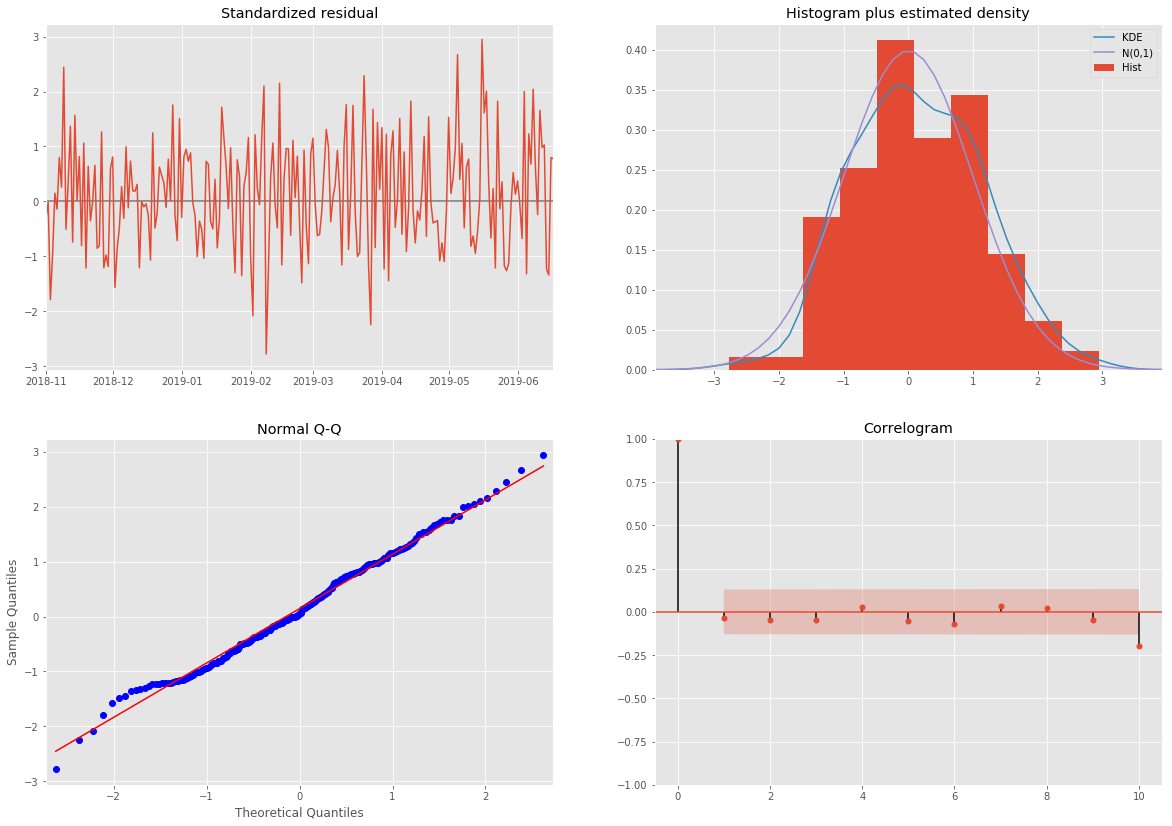

In [42]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

### Residuals plot gives us white noise graph with normal distribution.

### Make predictions

In [46]:
pred0 = results.get_prediction(start='2018-10-01', dynamic=False)
pred0_ci = pred0.conf_int()

In [47]:
pred1 = results.get_prediction(start='2018-10-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [52]:
pred2 = results.get_forecast('2019-09-27')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-06-18':'2019-07-27'])

2019-06-18     7.554256
2019-06-19     9.379553
2019-06-20    10.556806
2019-06-21     9.167899
2019-06-22     5.434745
2019-06-23     2.721822
2019-06-24     2.095070
2019-06-25    -0.811596
2019-06-26    -0.583857
2019-06-27     4.384837
2019-06-28     7.387674
2019-06-29     8.750571
2019-06-30    10.039189
2019-07-01    10.269927
2019-07-02     7.458108
2019-07-03     4.282326
2019-07-04     3.442900
2019-07-05     1.045674
2019-07-06     0.709438
2019-07-07     4.298640
2019-07-08     6.880604
2019-07-09     8.583826
2019-07-10     9.649301
2019-07-11     9.716764
2019-07-12     7.823573
2019-07-13     5.633371
2019-07-14     4.896577
2019-07-15     2.471638
2019-07-16     2.437283
2019-07-17     5.713947
2019-07-18     7.332861
2019-07-19     8.511234
2019-07-20     9.526463
2019-07-21     9.324789
2019-07-22     7.307745
2019-07-23     5.808454
2019-07-24     5.793918
2019-07-25     3.574242
2019-07-26     3.798435
2019-07-27     7.519792
Freq: D, dtype: float64


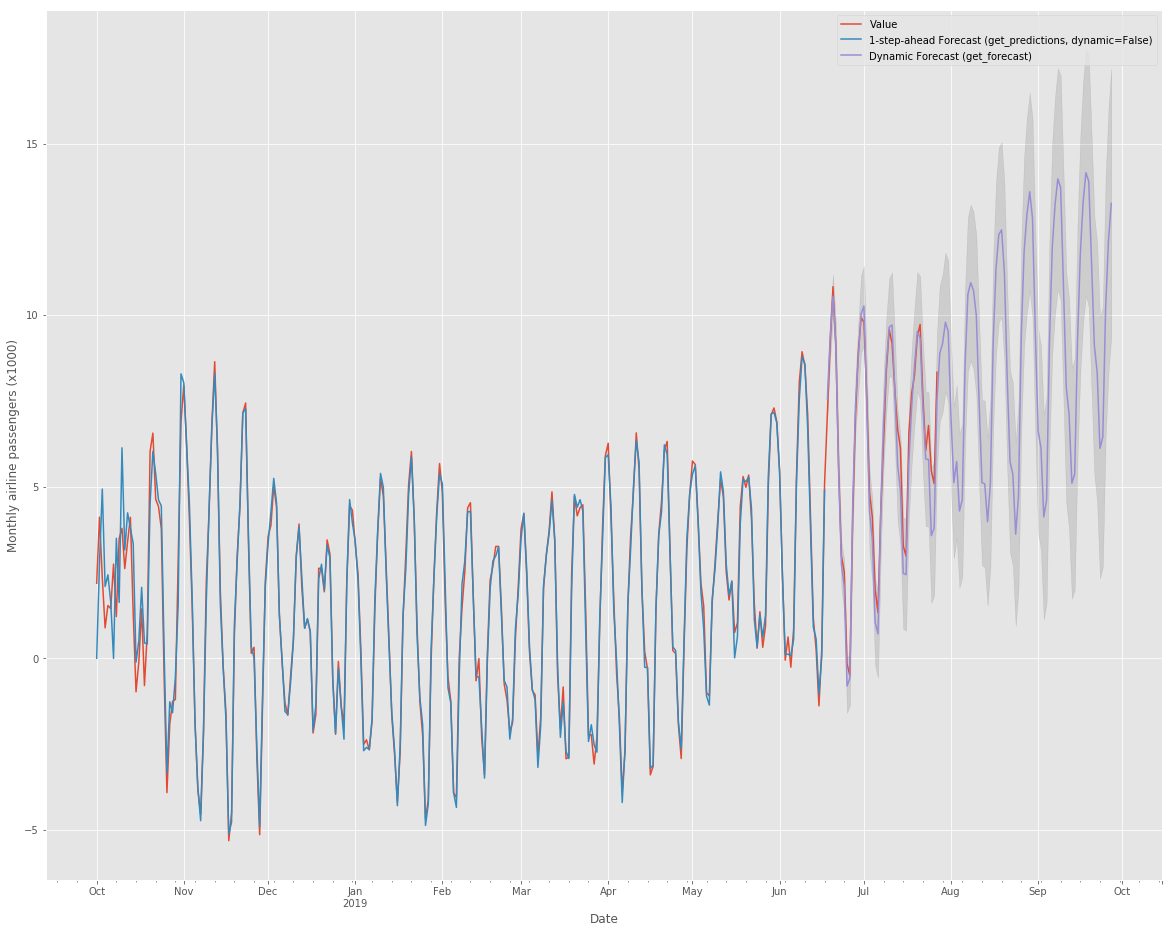

In [53]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
#pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

### Calculate model error using MAPE metric

In [56]:
prediction = pred2.predicted_mean['2019-06-18':'2019-07-27'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the last 40 time points forecast  is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the last 40 time points forecast  is 20.03%
